In [2]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#pd.set_option('max_colwidth', 1)

pd.set_option('display.max_rows', 10)

In [4]:
import warnings
warnings.filterwarnings("ignore")

# 3K Training records


In [5]:
df_3k = pd.read_csv('/content/gdrive/My Drive/Capstone Project/Amazon_Dataset/Python Notebook Files/Text Processing/Merged_ratings.csv', index_col=0)

In [6]:
df_3k['label'].value_counts()

1    1500
0    1500
Name: label, dtype: int64

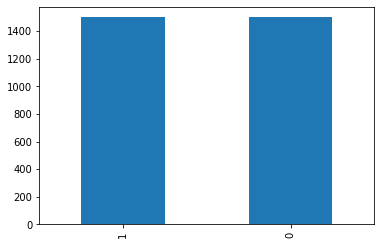

In [7]:
df_3k['label'].value_counts().plot(kind='bar')

## Replacing 'US' country alone. As it's creating a lot of discrepencies to use the country library to replace.

In [8]:
df_3k['text'].replace(to_replace='US',value='United States of America', inplace=True, regex=True)

## Regex

In [9]:
import re

REPLACE_NO_SPACE = re.compile("[.;:!\?,\"()\[\-&$@*^=%#`~+<>_|{}/]")


def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub(" ", line.lower()) for line in reviews]
    
    return reviews

In [10]:
df_3k['regex'] = preprocess_reviews(df_3k['text'])
df_3k.drop('text', axis=1, inplace=True)

## Spelling mistake correction

In [11]:
from textblob import TextBlob
df_3k['corrected'] = df_3k['regex'].apply(lambda txt: ''.join(TextBlob(txt).correct()))

## Lemmatization

In [12]:
import nltk
nltk.download('wordnet')
def get_lemmatized_text(corpus):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]
df_3k['lemmatized'] =  get_lemmatized_text(df_3k['corrected'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


## Stopwords Removal

In [13]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw = stopwords.words('english')
ss = sorted(sw)
print(ss)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'r

In [14]:
words_not_to_remove = ['no','not','above', 'after', 'against', 'aren',
                       "aren't", 'before', 'below', 'between', 'both', 'but','couldn',"couldn't", "don't",'didn', "didn't", 
                       'do', 'does', 'doesn', "doesn't" , 'hadn', "hadn't", 'hasn', "hasn't", 'haven', 'isn', "isn't", "haven't", 'mightn', "mightn't", 'mustn', "mustn't",'needn', "needn't",'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", "won't", 
                       'wouldn', "wouldn't",'y']

In [15]:
stop_words = []

for i in ss:
    if i not in words_not_to_remove:
        stop_words.append(i)

In [16]:
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() if word not in stop_words]))
    return removed_stop_words

In [17]:
df_3k['lem_stpwrd'] = remove_stop_words(df_3k['lemmatized'])

In [18]:
df_3k.columns

Index(['label', 'regex', 'corrected', 'lemmatized', 'lem_stpwrd'], dtype='object')

In [19]:
df_3k.drop(labels=['regex', 'corrected','lemmatized'], axis=1, inplace=True)

In [20]:
df_3k.reset_index(drop=True, inplace=True)

In [21]:
df_3k

label                                         lem_stpwrd
0         0  no way plug united state america unless go con...
1         1                          good case excellent value
2         1                                      great jawbone
3         0  tied charge conversation lasting 45 minute maj...
4         1                                          mid great
...     ...                                                ...
2995      0             think food flavor texture both lacking
2996      0                            appetite instantly gone
2997      0         overall wa not impressed would not go back
2998      0  whole experience wa underwhelming think we'll ...
2999      0  hadn't wasted enough life poured salt wound dr...

[3000 rows x 2 columns]

In [22]:
df_3k['lem_stpwrd'].replace({'wa':'','ha':''},regex=True,inplace=True)

In [23]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

## Positive Reviews word cloud

There are 64161 words in the combination of all review.


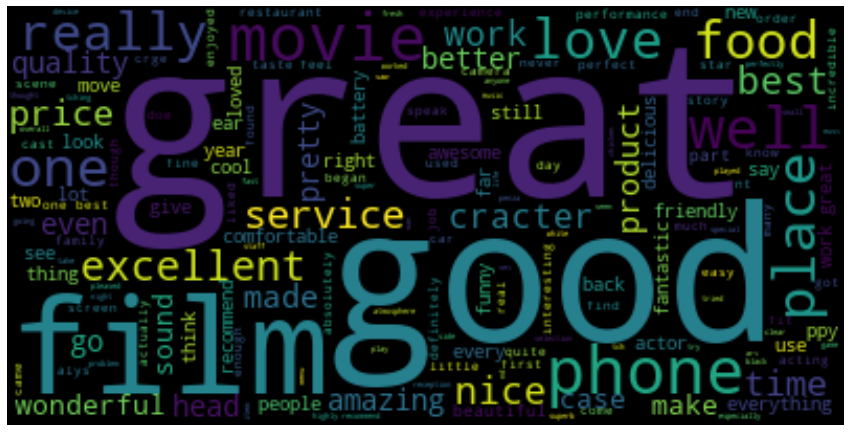

In [127]:
textpos = " ".join(review for review in df_3k[df_3k['label']==1].lem_stpwrd)
print ("There are {} words in the combination of all review.".format(len(textpos)))
plt.subplots(figsize=(15,10))
wordclpos = WordCloud(random_state=1).generate(textpos)
plt.imshow(wordclpos, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
## Bigram word cloud steps

In [25]:
a=pd.DataFrame((df_3k[df_3k['label']==1].lem_stpwrd).reset_index(drop=True))
a

lem_stpwrd
0                             good case excellent value
1                                         great jawbone
2                                             mid great
3                                      razor owner must
4                                   sound quality great
...                                                 ...
1495                           overall great experience
1496  regular boasted bread  equally satisfying occa...
1497                                   chip say amazing
1498                          new far began buffet spot
1499  every time eat see daring tearworn professiona...

[1500 rows x 1 columns]

In [26]:
import re
import nltk
from nltk.corpus import stopwords #To Remove the StopWords like "the","in" ect
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [27]:
def ngrams(data,n):
    text = " ".join(data)
    words = nltk.word_tokenize(text)
    ngram = list(nltk.ngrams(words,n))
    return ngram

In [28]:
import nltk
nltk.download('punkt')
ngram = ngrams(a['lem_stpwrd'],2)
ngram[1:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('case', 'excellent'),
 ('excellent', 'value'),
 ('value', 'great'),
 ('great', 'jawbone'),
 ('jawbone', 'mid'),
 ('mid', 'great'),
 ('great', 'razor'),
 ('razor', 'owner'),
 ('owner', 'must')]

In [29]:
"_".join(ngram[0])

'good_case'

In [30]:
for i in range(0,len(ngram)):
    ngram[i] = "_".join(ngram[i])
Bigram_Freq = nltk.FreqDist(ngram)

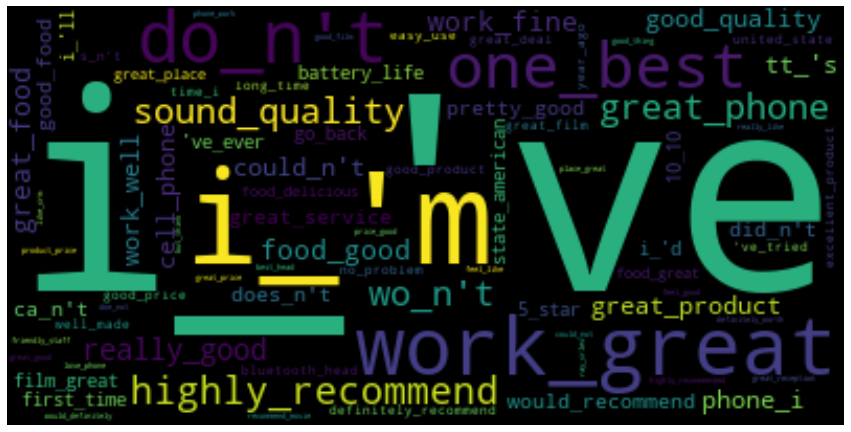

In [32]:
bigram_wordcloud = WordCloud(max_words=80,font_step=2,max_font_size=500,random_state = 21).generate_from_frequencies(Bigram_Freq)
plt.figure(figsize = (15,10))
plt.imshow(bigram_wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

## Negative reviews word cloud

There are 62668 words in the combination of all review.


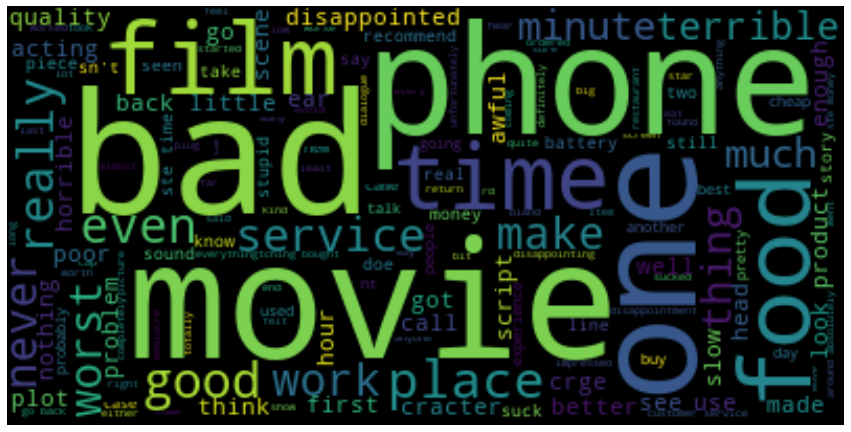

In [33]:
textpos = " ".join(review for review in df_3k[df_3k['label']==0].lem_stpwrd)
print ("There are {} words in the combination of all review.".format(len(textpos)))
plt.subplots(figsize=(15,10))
wordclpos = WordCloud(random_state=1).generate(textpos)
plt.imshow(wordclpos, interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
b=pd.DataFrame((df_3k[df_3k['label']==0].lem_stpwrd).reset_index(drop=True))
b

lem_stpwrd
0     no y plug united state america unless go conve...
1     tied crge conversation lasting 45 minute major...
2          jingle plug get line right get decent volume
3     several dozen several hundred contact imagine ...
4                                 needle say sted money
...                                                 ...
1495             think food flavor texture both lacking
1496                            appetite instantly gone
1497           overall  not impressed would not go back
1498  whole experience  underwhelming think we'll go...
1499  dn't sted enough life poured salt wound drawin...

[1500 rows x 1 columns]

In [35]:
def ngrams(data,n):
    text = " ".join(data)
    words = nltk.word_tokenize(text)
    ngram = list(nltk.ngrams(words,n))
    return ngram

In [36]:
import nltk
nltk.download('punkt')
ngram = ngrams(b['lem_stpwrd'],2)
ngram[1:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('y', 'plug'),
 ('plug', 'united'),
 ('united', 'state'),
 ('state', 'america'),
 ('america', 'unless'),
 ('unless', 'go'),
 ('go', 'converted'),
 ('converted', 'tied'),
 ('tied', 'crge')]

In [37]:
"_".join(ngram[4])

'state_america'

In [38]:
for i in range(0,len(ngram)):
    ngram[i] = "_".join(ngram[i])
Bigram_Freq = nltk.FreqDist(ngram)

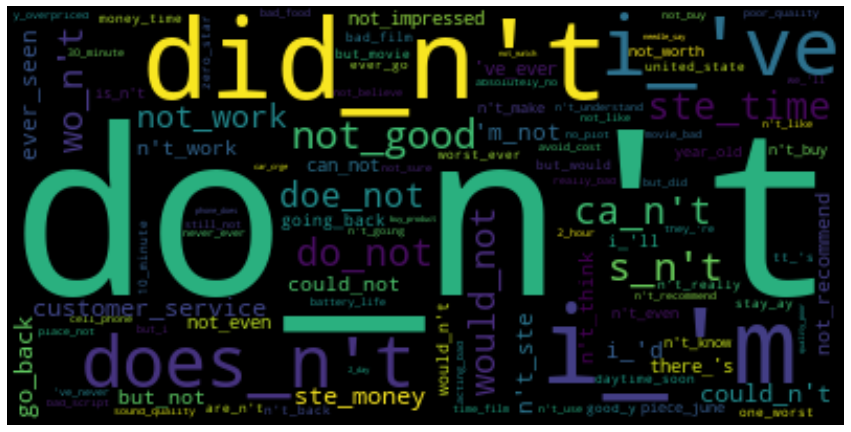

In [39]:
bigram_wordcloud = WordCloud(max_words=100,font_step=2,max_font_size=500,random_state = 21).generate_from_frequencies(Bigram_Freq)
plt.figure(figsize = (15,10))
plt.imshow(bigram_wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

## Amazon dataset

In [40]:
df_ama = pd.read_csv("/content/gdrive/My Drive/Capstone Project/Amazon_Dataset/Python Notebook Files/Text Processing/Amazon_Basic_EDA_03.csv", index_col=0)

In [41]:
df_ama.drop(labels=['categories','name','primaryCategories','reviews.date','reviews.doRecommend','reviews.numHelpful','reviews.username'], axis=1, inplace=True)

In [42]:
df_ama['reviews.rating'].value_counts()

5.0    47149
4.0    15397
3.0     2902
1.0     1438
2.0     1072
Name: reviews.rating, dtype: int64

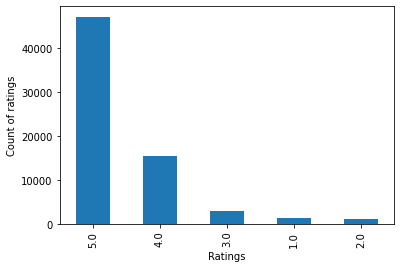

In [43]:
df_ama['reviews.rating'].value_counts().plot(kind='bar',xlabel='Ratings',ylabel='Count of ratings')

In [44]:
df_ama.drop(labels=['combined_scores','combined_compound','score','Compound_Score'], axis=1, inplace=True)

In [45]:
df_ama['reviews.rating'] = df_ama['reviews.rating'].astype(int)

In [46]:
df_ama = df_ama[(df_ama['reviews.rating']==1) | (df_ama['reviews.rating']==5)]

In [47]:
df_ama.reset_index(drop=True, inplace=True)

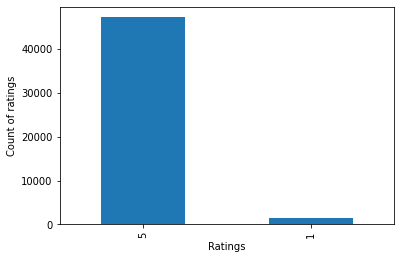

In [48]:
df_ama['reviews.rating'].value_counts().plot(kind='bar',xlabel='Ratings',ylabel='Count of ratings')

In [49]:
df_ama.head(1)

reviews.rating  ...                                         text_title
0               5  ...  ... are not Duracell but for the price i am ha...

[1 rows x 4 columns]

# Text Processing

## Replacing 'US' country alone. As it's creating a lot of discrepencies to use the country library to replace.

In [50]:
df_ama['text_title'].replace(to_replace='US',value='United States of America', inplace=True, regex=True)

## Regex

In [51]:
import re

REPLACE_NO_SPACE = re.compile("[.;:!\?,\"()\[\-&$@*^=%#`~+<>_|{}/]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")               ## Used for link removal 


def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub(" ", line.lower()) for line in reviews]
    #reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

In [52]:
df_ama['regex'] = preprocess_reviews(df_ama['text_title'])

In [53]:
df_ama.drop('text_title', axis=1, inplace=True)

## Spelling mistake correction

In [54]:
from textblob import TextBlob

In [ ]:
df_ama['corrected'] = df_ama['regex'].apply(lambda txt: ''.join(TextBlob(txt).correct()))

## Lemmatization

In [57]:
def get_lemmatized_text(corpus):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

In [58]:
import nltk
nltk.download('wordnet')
df_ama['lemmatized'] =  get_lemmatized_text(df_ama['corrected'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Stopwords Removal

In [59]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw = stopwords.words('english')
ss = sorted(sw)
print(ss)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', '

In [60]:
words_not_to_remove = ['no','not','above', 'after', 'against', 'aren',
                       "aren't", 'before', 'below', 'between', 'both', 'but','couldn',"couldn't", "don't",'didn', "didn't", 
                       'do', 'does', 'doesn', "doesn't" , 'hadn', "hadn't", 'hasn', "hasn't", 'haven', 'isn', "isn't", "haven't", 'mightn', "mightn't", 'mustn', "mustn't",'needn', "needn't",'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", "won't", 
                       'wouldn', "wouldn't",'y']

In [61]:
stop_words = []

for i in ss:
    if i not in words_not_to_remove:
        stop_words.append(i)

In [62]:
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() if word not in stop_words]))
    return removed_stop_words

In [63]:
df_ama['lem_stpwrd'] = remove_stop_words(df_ama['lemmatized'])

In [64]:
df_ama.columns

Index(['reviews.rating', 'reviews.text', 'reviews.title', 'regex', 'corrected',
       'lemmatized', 'lem_stpwrd'],
      dtype='object')

In [65]:
df_ama.drop(labels=['regex', 'corrected','lemmatized'], axis=1, inplace=True)

In [66]:
df_ama.head()

reviews.rating  ...                                         lem_stpwrd
0               5  ...  not duracell but price happy well not duracell...
1               5  ...  well name brand battery much better seem work ...
2               5  ...  battery long lasting price great battery long ...
3               5  ...  battery christmas amazonbasics cell good haven...
4               5  ...  battery ordered past pleased give not problem ...

[5 rows x 4 columns]

In [67]:
df_ama['lem_stpwrd'].replace({'wa':'','ha':''},regex=True,inplace=True)

In [ ]:
## Word cloud

## Negative Reviews word cloud 

In [69]:
import numpy as np
mask = np.array(Image.open('/content/ama_logo.png'))

There are 231380 words in the combination of all review.


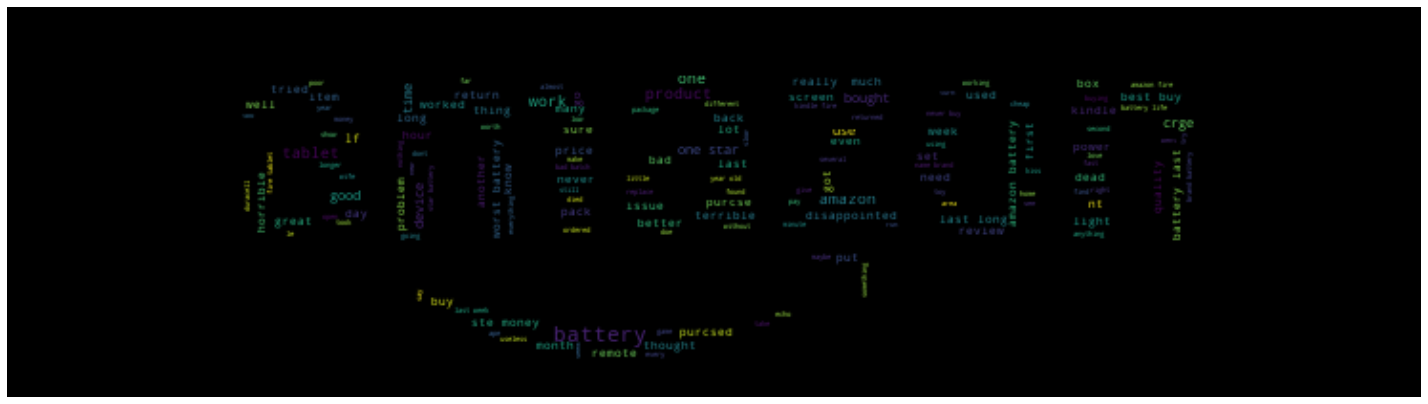

In [71]:
textneg = " ".join(review for review in df_ama[df_ama['reviews.rating']==1]['lem_stpwrd'])
print ("There are {} words in the combination of all review.".format(len(textneg)))
wc = WordCloud(background_color='black', mask=mask, mode='RGB', 
              width=1000, max_words=200, height=1000,
              random_state=1)
wc.generate(textneg)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
#  interpolation="bilinear" in the plt.imshow(),  is used to make the displayed image appear more smoothly
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

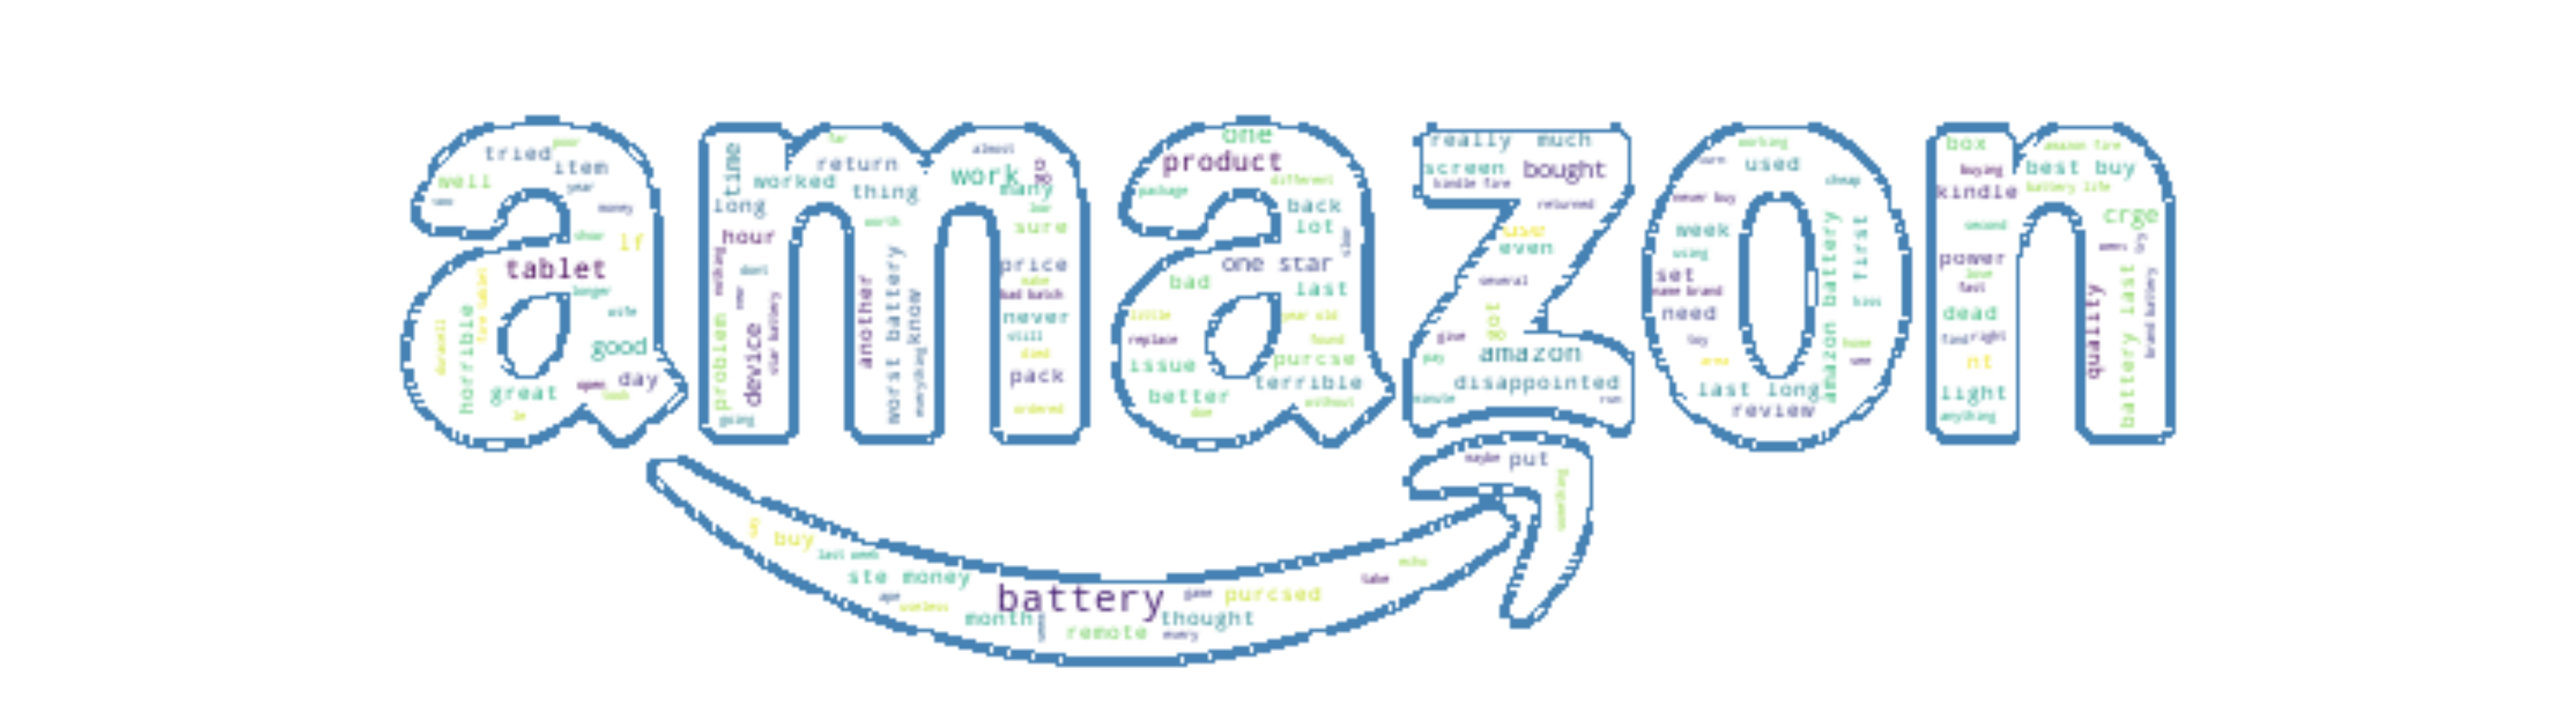

In [72]:
wc = WordCloud(background_color='white', mask=mask, mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='steelblue')
wc.generate(textneg)
plt.figure(figsize=(50, 20))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

Bigram WordCloud

In [ ]:
b=pd.DataFrame(df_ama[df_ama['reviews.rating']==1]['lem_stpwrd'].reset_index(drop=True))
b

In [ ]:
def ngrams(data,n):
    text = " ".join(data)
    words = nltk.word_tokenize(text)
    ngram = list(nltk.ngrams(words,n))
    return ngram

In [73]:
import nltk
nltk.download('punkt')
ngram = ngrams(b['lem_stpwrd'],2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [74]:
for i in range(0,len(ngram)):
    ngram[i] = "_".join(ngram[i])
Bigram_Freq = nltk.FreqDist(ngram)

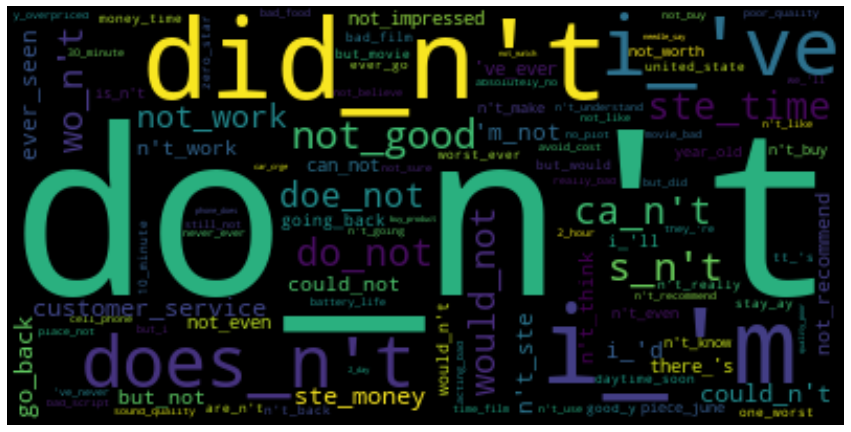

In [75]:
bigram_wordcloud = WordCloud(max_words=100,font_step=2,max_font_size=500,random_state = 21).generate_from_frequencies(Bigram_Freq)
plt.figure(figsize = (15,10))
plt.imshow(bigram_wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

# Positive Reviews word cloud

There are 231380 words in the combination of all review.


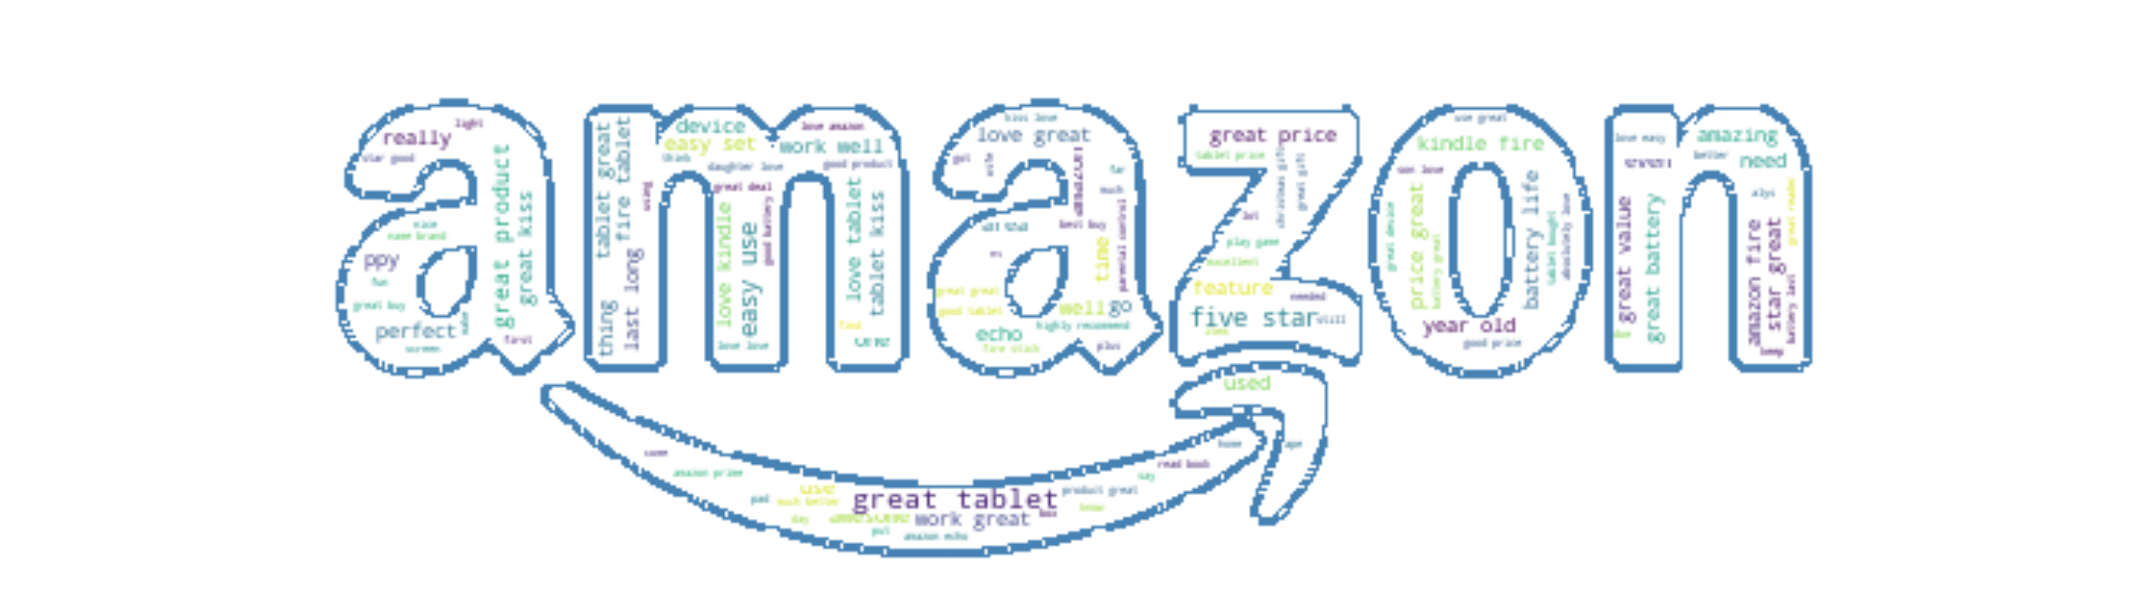

In [ ]:
textpos = " ".join(review for review in df_ama[df_ama['reviews.rating']==5]['lem_stpwrd'])
print ("There are {} words in the combination of all review.".format(len(textneg)))
wc = WordCloud(background_color='white', mask=mask, mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='steelblue')
wc.generate(textpos)
plt.figure(figsize=(30, 20))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [76]:
c=pd.DataFrame(df_ama[df_ama['reviews.rating']==5]['lem_stpwrd'].reset_index(drop=True))
def ngrams(data,n):
    text = " ".join(data)
    words = nltk.word_tokenize(text)
    ngram = list(nltk.ngrams(words,n))
    return ngram

In [77]:
import nltk
nltk.download('punkt')
ngram = ngrams(c['lem_stpwrd'],2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [78]:
for i in range(0,len(ngram)):
    ngram[i] = "_".join(ngram[i])
Bigram_Freq = nltk.FreqDist(ngram)

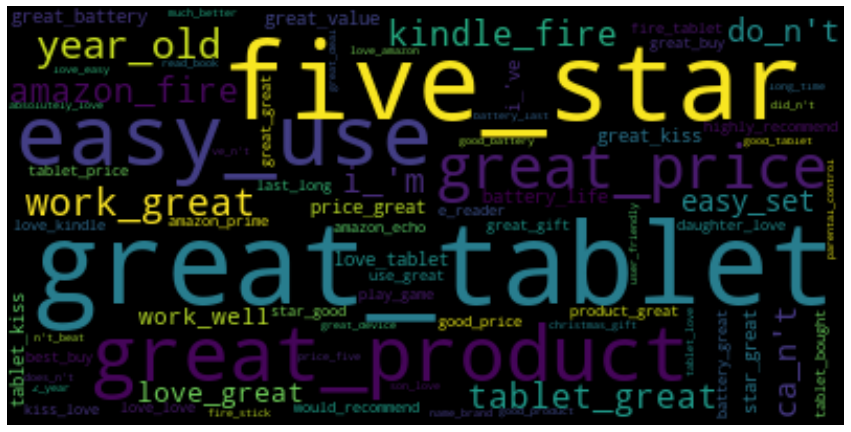

In [79]:
bigram_wordcloud = WordCloud(max_words=100,font_step=2,max_font_size=500,random_state = 21).generate_from_frequencies(Bigram_Freq)
plt.figure(figsize = (15,10))
plt.imshow(bigram_wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

# Extracting good and bad reviews from Amazon dataset to add to the training 3k dataset

### Apply TextBlob text polarity for identifying records without Anomalies from Amazon dataset

In [80]:
df_ama['blob_polarity'] = df_ama['lem_stpwrd'].apply(lambda x: TextBlob(str(x)).sentiment[0])

#### Replacing ratings 5 and 1 by 1 and 0 resp. for simplicity

In [81]:
df_ama['reviews.rating'].replace({5:1,1:0}, inplace=True)

## Good reviews (5 ratings)

In [82]:
df_check_p  = df_ama[df_ama['blob_polarity']>0.7]

In [83]:
df_check_p['reviews.rating'].value_counts()

1    6953
0       7
Name: reviews.rating, dtype: int64

In [84]:
pd.set_option('display.max_rows', 100)

In [85]:
df_check_p.sample(n=100, random_state=20)


reviews.rating  ... blob_polarity
11613               1  ...      0.750000
23608               1  ...      0.800000
6911                1  ...      0.850000
22536               1  ...      0.750000
47370               1  ...      0.700000
32813               1  ...      1.000000
8830                1  ...      0.766667
2149                1  ...      0.800000
33026               1  ...      0.800000
4522                1  ...      0.800000
1881                1  ...      0.800000
26599               1  ...      0.800000
37292               1  ...      1.000000
45928               1  ...      0.800000
7838                1  ...      0.800000
23090               1  ...      0.800000
10818               1  ...      0.933333
31949               1  ...      0.811111
6368                1  ...      0.800000
29767               1  ...      0.750000
5114                1  ...      0.800000
2287                1  ...      0.800000
16351               1  ...      0.750000
1991                1  ...      0.800000
14215               1  ...      0.800000
38658               1  ...      0.900000
46928               1  ...      0.900000
7826                1  ...      0.800000
20005               1  ...      0.850000
38606               1  ...      0.700000
880                 1  ...      1.000000
47593               1  ...      0.700000
20938               1  ...      0.800000
12252               1  ...      0.766667
1440                1  ...      1.000000
44246               1  ...      0.733333
44356               1  ...      0.900000
4908                1  ...      0.800000
16264               1  ...      0.750000
36664               1  ...      0.733333
5713                1  ...      0.766667
2406                1  ...      0.800000
41020               1  ...      1.000000
31453               1  ...      0.700000
44428               1  ...      0.760000
19330               1  ...      0.933333
47492               1  ...      0.700000
41419               1  ...      0.800000
14988               1  ...      1.000000
31207               1  ...      0.800000
47272               1  ...      0.700000
15377               1  ...      0.766667
2067                1  ...      0.800000
41403               1  ...      0.750000
37931               1  ...      0.750000
29261               1  ...      0.766667
26148               1  ...      0.850000
41524               1  ...      0.900000
37610               1  ...      0.750000
34285               1  ...      0.766667
15561               1  ...      0.716667
31085               1  ...      0.800000
47079               1  ...      0.800000
12402               1  ...      0.708333
28315               1  ...      1.000000
33159               1  ...      0.700000
7756                1  ...      0.750000
33745               1  ...      0.733333
24677               1  ...      1.000000
16485               1  ...      0.900000
28661               1  ...      0.775000
40582               1  ...      0.866667
30155               1  ...      0.766667
13912               1  ...      1.000000
19860               1  ...      0.800000
1248                1  ...      1.000000
42236               1  ...      0.760000
5106                1  ...      0.900000
23519               1  ...      0.900000
41738               1  ...      0.800000
40388               1  ...      0.800000
2266                1  ...      0.750000
6526                1  ...      0.750000
6453                1  ...      0.766667
11284               1  ...      1.000000
46521               1  ...      0.800000
41657               1  ...      0.766667
7700                1  ...      0.750000
9948                1  ...      0.900000
48140               1  ...      0.766667
1435                1  ...      0.933333
45407               1  ...      1.000000
26926               1  ...      0.800000
35177               1  ...      0.750000
44698               1  ...      0.791667
14159               1  ...      0.733333
28645               1  ...    

- Manually checked 100+ records for the 6961. They were all +ve

In [86]:
ind_5_remove = df_check_p[df_check_p['reviews.rating']==0].index.to_list()

In [87]:
ind_5_remove

[27864, 29633, 30415, 32211, 33396, 37259, 40028]

In [88]:
df_check_p.drop(index=ind_5_remove, inplace=True)

### Removing these 7k records from Amazon dataset

In [89]:
pindex_to_remove = df_check_p.index.to_list()

In [90]:
len(pindex_to_remove)

6953

In [91]:
df_ama.shape

(48587, 5)

In [92]:
df_ama.drop(index=pindex_to_remove, inplace=True)

In [93]:
df_ama.shape

(41634, 5)

### Resetting index after removing 6.9k records

In [94]:
df_check_p.reset_index(drop=True,inplace=True)

In [95]:
df_check_p['reviews.rating'].value_counts()

1    6953
Name: reviews.rating, dtype: int64

### Bad reviews (rating = 1)

In [96]:
df_check_n  = df_ama[df_ama['blob_polarity'] < 0.0]  # threshold below 0, gives decent amount of records

In [97]:
df_check_n['reviews.rating'].value_counts()

1    798
0    705
Name: reviews.rating, dtype: int64

In [98]:
df_check_n = df_check_n[df_check_n['reviews.rating']==0]

In [99]:
df_check_n.sample(n=100, random_state=20)

reviews.rating  ... blob_polarity
5571                0  ...     -0.033333
32038               0  ...     -0.475000
32378               0  ...     -0.400000
28044               0  ...     -0.200000
368                 0  ...     -0.300000
21454               0  ...     -0.121212
437                 0  ...     -0.166667
34962               0  ...     -0.090000
7190                0  ...     -0.105556
372                 0  ...     -0.050000
22631               0  ...     -0.100000
13207               0  ...     -0.562500
19138               0  ...     -0.466667
6931                0  ...     -0.350000
6174                0  ...     -0.500000
5986                0  ...     -0.075000
37773               0  ...     -0.750000
6088                0  ...     -0.272704
34098               0  ...     -0.150000
5013                0  ...     -0.500000
5025                0  ...     -0.750000
26367               0  ...     -0.357143
22177               0  ...     -0.029167
6983                0  ...     -0.400000
17929               0  ...     -0.090000
31188               0  ...     -0.015179
5578                0  ...     -0.025000
43970               0  ...     -0.300000
7138                0  ...     -0.094792
6436                0  ...     -0.198611
5984                0  ...     -0.016204
5579                0  ...     -0.375000
25025               0  ...     -0.060000
9294                0  ...     -0.750000
39428               0  ...     -0.016667
7137                0  ...     -0.500000
9289                0  ...     -0.025000
5509                0  ...     -0.031250
6928                0  ...     -1.000000
365                 0  ...     -0.700000
32393               0  ...     -0.067030
30237               0  ...     -0.229167
38598               0  ...     -0.125000
28031               0  ...     -0.387500
5809                0  ...     -0.076000
19184               0  ...     -0.188977
9418                0  ...     -0.097186
9031                0  ...     -0.102381
9736                0  ...     -0.584375
23578               0  ...     -0.366667
9954                0  ...     -0.125000
42011               0  ...     -0.016667
5678                0  ...     -0.800000
5603                0  ...     -0.025000
767                 0  ...     -0.178571
9285                0  ...     -0.600000
5442                0  ...     -0.500000
17078               0  ...     -0.135937
9638                0  ...     -0.266667
14465               0  ...     -0.150000
40126               0  ...     -0.350000
25420               0  ...     -0.875000
18880               0  ...     -0.433333
784                 0  ...     -0.016667
9041                0  ...     -0.283333
789                 0  ...     -0.600000
9494                0  ...     -0.266667
5606                0  ...     -0.100000
9680                0  ...     -0.207143
367                 0  ...     -0.700000
7110                0  ...     -0.075000
27034               0  ...     -0.166667
5908                0  ...     -0.145833
9279                0  ...     -1.000000
5673                0  ...     -0.050000
959                 0  ...     -0.105556
635                 0  ...     -0.091667
26657               0  ...     -0.100000
9303                0  ...     -0.400000
44413               0  ...     -0.175000
6539                0  ...     -0.037500
5684                0  ...     -0.600000
23                  0  ...     -0.020000
5584                0  ...     -0.158333
22548               0  ...     -0.211333
13449               0  ...     -0.357143
6694                0  ...     -1.000000
371                 0  ...     -0.183333
9153                0  ...     -0.015909
34289               0  ...     -0.211333
5686                0  ...     -0.312500
28714               0  ...     -0.038462
6963                0  ...     -0.166667
763                 0  ...     -0.750000
31000               0  ...     -0.150000
22206               0  ...     -0.433333
435                 0  ...    

In [100]:
df_check_n['reviews.rating'].value_counts()

0    705
Name: reviews.rating, dtype: int64

- Manually checked 100 samples from the record. They are all -ve

### Removing these 738 records from Amazon dataset

In [101]:
nindex_to_remove = df_check_n.index.to_list()

In [102]:
len(nindex_to_remove)

705

In [103]:
df_ama.shape

(41634, 5)

In [104]:
df_ama.drop(index=nindex_to_remove, inplace=True)

In [105]:
df_ama.shape

(40929, 5)

### Resetting the indexes after removing the negative records

In [106]:
df_check_n.reset_index(drop=True, inplace=True)

In [107]:
pd.set_option('display.max_rows', 10)

In [108]:
df_pn_concat = pd.concat([df_check_p,df_check_n], axis=0)

In [109]:
df_pn_concat.reset_index(drop=True, inplace=True)

In [110]:
# what was removed from the Amazon dataset
df_pn_concat['reviews.rating'].value_counts()

1    6953
0     705
Name: reviews.rating, dtype: int64

In [111]:
df_pn_concat = df_pn_concat[['reviews.rating','lem_stpwrd']]

In [112]:
df_pn_concat.rename(columns=({'reviews.rating':'label'}), inplace=True)

In [113]:
df_pn_concat['label'] = df_pn_concat['label'].astype(int)

In [114]:
df_pn_concat.shape

(7658, 2)

### Concatenate 2 files

In [115]:
# 3k records

df_train = pd.concat([df_3k,df_pn_concat], axis=0)

In [116]:
df_train.shape

(10658, 2)

In [117]:
df_train.reset_index(drop=True, inplace=True)

In [118]:
df_train.isnull().sum()

label         0
lem_stpwrd    0
dtype: int64

# Saving the training data (3k+7k) and testing (Amazon)

### Training model

In [119]:
df_train.to_csv('Final_train_data.csv')
df_train

label                                         lem_stpwrd
0          0  no y plug united state america unless go conve...
1          1                          good case excellent value
2          1                                      great jawbone
3          0  tied crge conversation lasting 45 minute major...
4          1                                          mid great
...      ...                                                ...
10653      0  great concept bad remote paring supplied amazo...
10654      0  keep looking barely k content law lot not wort...
10655      0  ridiculous  already not pleased amazon's choic...
10656      0  not necessary exactly like u power crge making...
10657      0  not worth money  surprised find not come type ...

[10658 rows x 2 columns]

In [120]:
df_train['lem_stpwrd'].replace({'kiss':'kids'},regex=True,inplace=True)

There are 653422 words in the combination of all review.


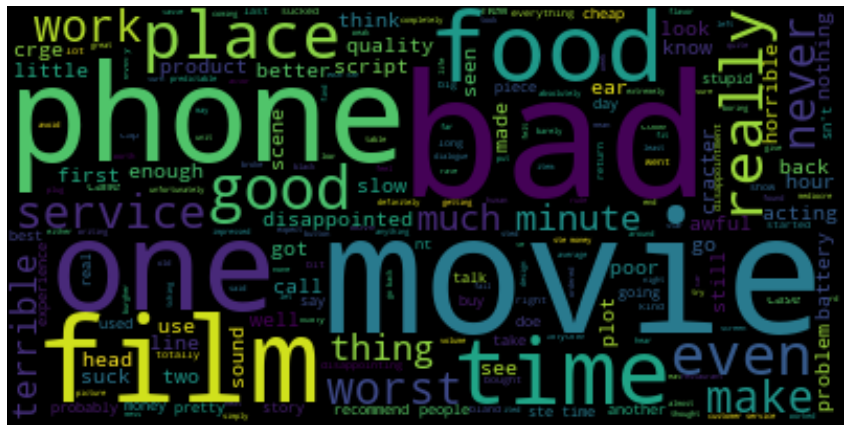

In [121]:
text = " ".join(review for review in df_train['lem_stpwrd'])
print ("There are {} words in the combination of all review.".format(len(text)))
plt.subplots(figsize=(15,10))
wordclpos = WordCloud(random_state=1).generate(textpos)
plt.imshow(wordclpos, interpolation='bilinear')
plt.axis('off')
plt.show()

In [123]:
c=pd.DataFrame(df_train['lem_stpwrd'].reset_index(drop=True))
def ngrams(data,n):
    text = " ".join(data)
    words = nltk.word_tokenize(text)
    ngram = list(nltk.ngrams(words,n))
    return ngram

In [124]:
import nltk
nltk.download('punkt')
ngram = ngrams(c['lem_stpwrd'],2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [125]:
for i in range(0,len(ngram)):
    ngram[i] = "_".join(ngram[i])
Bigram_Freq = nltk.FreqDist(ngram)

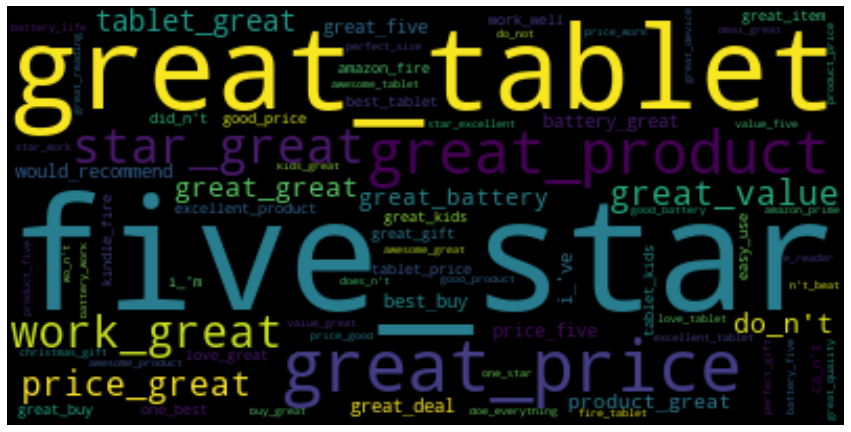

In [126]:
bigram_wordcloud = WordCloud(max_words=100,font_step=2,max_font_size=500,random_state = 21).generate_from_frequencies(Bigram_Freq)
plt.figure(figsize = (15,10))
plt.imshow(bigram_wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

### Testing data

In [ ]:
df_ama.to_csv('Final_test_data.csv')

In [ ]:
df_ama.shape

(40929, 5)

There are 231380 words in the combination of all review.


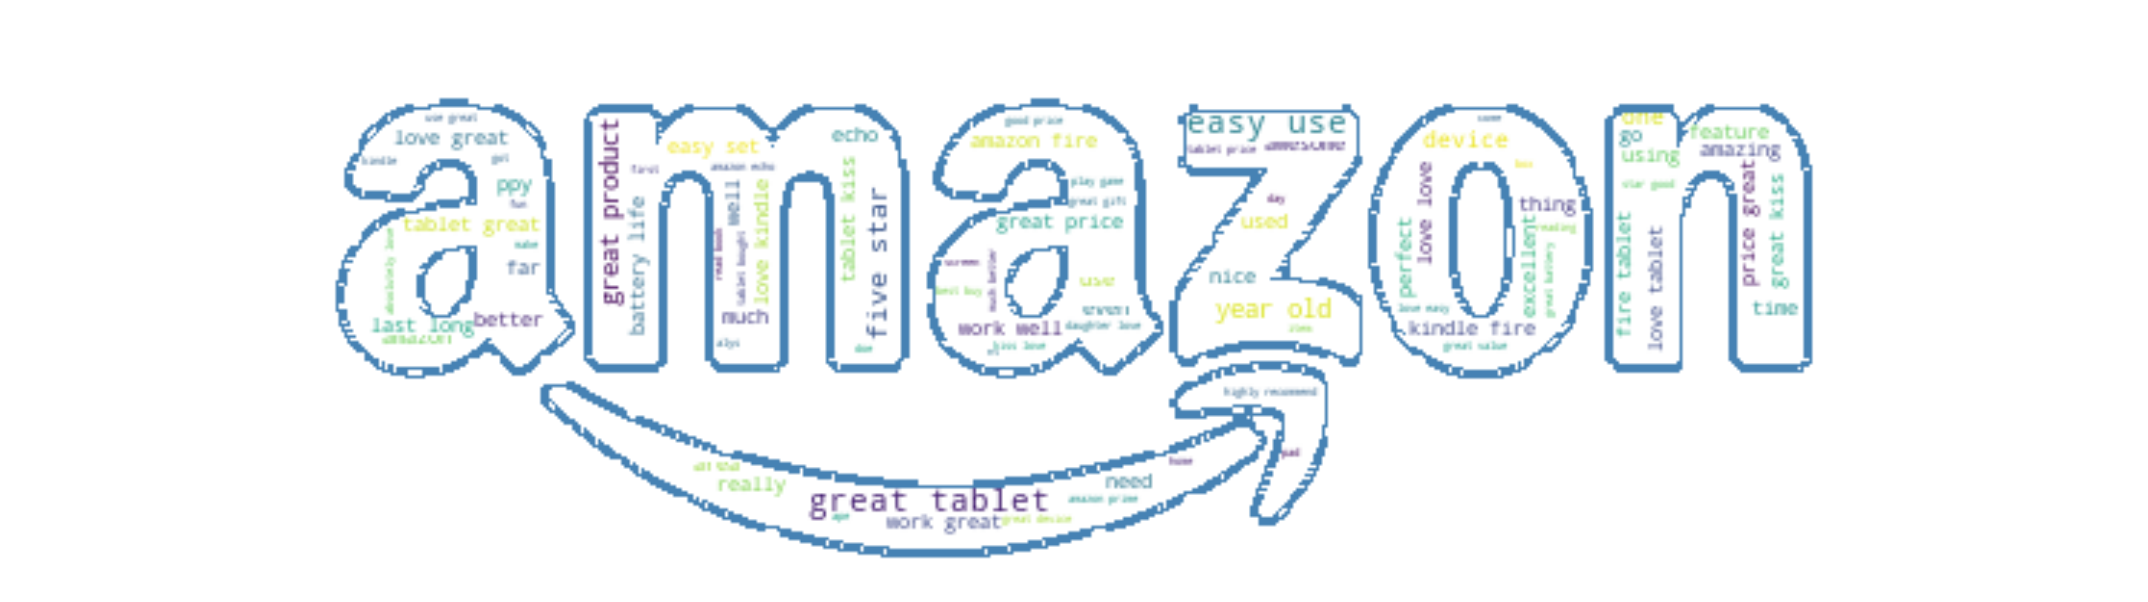

In [ ]:
text = " ".join(review for review in df_ama['lem_stpwrd'])
print ("There are {} words in the combination of all review.".format(len(textneg)))
wc = WordCloud(background_color='white', mask=mask, mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='steelblue')
wc.generate(text)
plt.figure(figsize=(30, 30))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [ ]:
import re

REPLACE_NO_SPACE = re.compile("[.;:!\?,\"()\[\-&$@*^=%#`~+<>_|{}/]")
def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub(" ", line.lower()) for line in reviews]
    #reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    a=''.join(reviews)
    return a
a=preprocess_reviews('That is,a,@gret Day: beatter? without! (walking taliking troubleing goad $ 10 # corpora batteries')

In [ ]:
a

'that is a  gret day  beatter  without   walking taliking troubleing goad   10   corpora batteries'

In [ ]:
from textblob import TextBlob
b=TextBlob(a).correct()
b

TextBlob("that is a  great day  better  without   walking talking troubling good   10   corpora batteries")

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def get_lemmatized_text(corpus):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in corpus.split()])]
c=get_lemmatized_text(b)
c

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['that is a great day better without walking talking troubling good 10 corpus battery']

In [ ]:
lemmatizer.lemmatize('corpora')

'corpus'

In [ ]:
'A'.lower()

'a'